<a href="https://colab.research.google.com/github/glebmikha/ab-testing-course/blob/main/03_ab_testing_course_pregnancy_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

https://drive.google.com/file/d/1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI/view?usp=sharing

In [2]:
! pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [3]:
! gdown 1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI

Downloading...
From: https://drive.google.com/uc?id=1T-nWdDdnjNWHjuwHvFaTQqlQ8ewz9hYI
To: /content/pregnancy.csv
100% 60.0k/60.0k [00:00<00:00, 15.6MB/s]


In [2]:
df = pd.read_csv('pregnancy.csv')

In [3]:
len(df)

10000

In [4]:
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


Google sheets solution https://docs.google.com/spreadsheets/d/1MK1rnOt8JzbOVOM3sZDTfL6JLbEwjTNcb1GqupQW1AQ/edit?usp=sharing

In [5]:
df['accuracy_1'] = df['y_true'] == df['y_pred1']

In [6]:
df['accuracy_2'] = df['y_true'] == df['y_pred2']

In [7]:
df.groupby('y_true')[['accuracy_1','accuracy_2']].mean()

,accuracy_1,accuracy_2
y_true,,
0,0.908444,0.949135
1,0.990167,0.950836


In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(df['y_true'],df['y_pred1'])

0.95

In [10]:
accuracy_score(df['y_true'],df['y_pred2'])

0.95

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

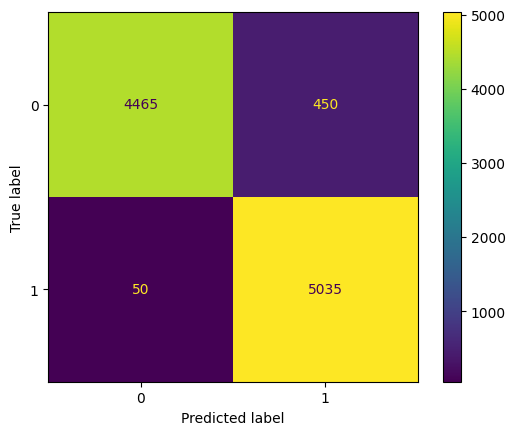

In [12]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

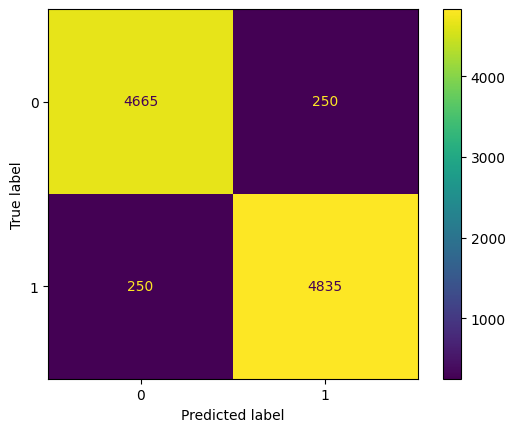

In [13]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [14]:
confusion_matrix(df['y_true'], df['y_pred2'])

array([[4665,  250],
       [ 250, 4835]], dtype=int64)

In [16]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()
tn

4665